In [1]:
import pandas as pd
import numpy as np
import jsonlines
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'bllip_ltg_test_scores.csv')
base_df = pd.read_csv(r'init_blimp_comparison.csv')

In [3]:
gb_df = df.groupby('linguistics_term').agg(list)

In [4]:
def avg_list(lst):
    return sum(lst) / len(lst)

In [5]:
gb_df['Control'] = gb_df['Control'].apply(avg_list)
gb_df['Distilled'] = gb_df['Distilled'].apply(avg_list)

In [22]:
df

,file,Control,Distilled,linguistics_term
0,blimp_data/adjunct_island.jsonl,57.9,64.1,island_effects
1,blimp_data/causative.jsonl,58.4,57.5,argument_structure
2,blimp_data/existential_there_quantifiers_1.jsonl,85.1,85.4,quantifiers
3,blimp_data/determiner_noun_agreement_with_adj_...,77.0,74.3,determiner_noun_agreement
4,blimp_data/expletive_it_object_raising.jsonl,61.0,62.1,control_raising
...,...,...,...,...
62,blimp_data/animate_subject_trans.jsonl,73.8,70.5,s-selection
63,blimp_data/wh_questions_subject_gap_long_dista...,81.8,77.2,filler_gap_dependency
64,blimp_data/sentential_negation_npi_licensor_pr...,93.0,96.3,npi_licensing
65,blimp_data/drop_argument.jsonl,69.6,68.2,argument_structure


In [26]:
dist_total = 0
control_total = 0

total_ties = 0

dist_sep = 0
cont_sep = 0
for i, row in df.iterrows():
    dist = row['Distilled']
    cont = row['Control']
    if dist > cont:
        dist_total += 1
        sep = dist - cont
        dist_sep += sep
    elif dist == cont:
        total_ties += 1
        print(row['file'])
    else:
        control_total += 1
        sep = cont - dist
        cont_sep += sep
print(f"Total ties: {total_ties}")
print(f"Distilled: {dist_total}\tControl: {control_total}")
print(f"Total Separation: Distilled = {dist_sep}\tControl = {cont_sep}")
print(f"Average Separation: Distilled = {dist_sep/dist_total}\tControl = {cont_sep/control_total}")

blimp_data/matrix_question_npi_licensor_present.jsonl
Total ties: 1
Distilled: 38	Control: 28
Total Separation: Distilled = 122.09999999999998	Control = 65.29999999999998
Average Separation: Distilled = 3.2131578947368418	Control = 2.3321428571428564


In [21]:
dist_total = 0
control_total = 0

total_ties = 0

dist_sep = 0
cont_sep = 0
for i, row in base_df.iterrows():
    dist = row['Distilled']
    cont = row['Control']
    if dist > cont:
        dist_total += 1
        sep = dist - cont
        dist_sep += sep
    elif dist == cont:
        total_ties += 1
    else:
        control_total += 1
        sep = cont - dist
        cont_sep += sep
print(f"Total ties: {total_ties}")
print(f"Distilled: {dist_total}\tControl: {control_total}")
print(f"Total Separation: Distilled = {dist_sep}\tControl = {cont_sep}")
print(f"Average Separation: Distilled = {dist_sep/dist_total}\tControl = {cont_sep/control_total}")

Total ties: 0
Distilled: 23	Control: 44
Total Separation: Distilled = 88.6	Control = 218.49999999999991
Average Separation: Distilled = 3.8521739130434782	Control = 4.965909090909089


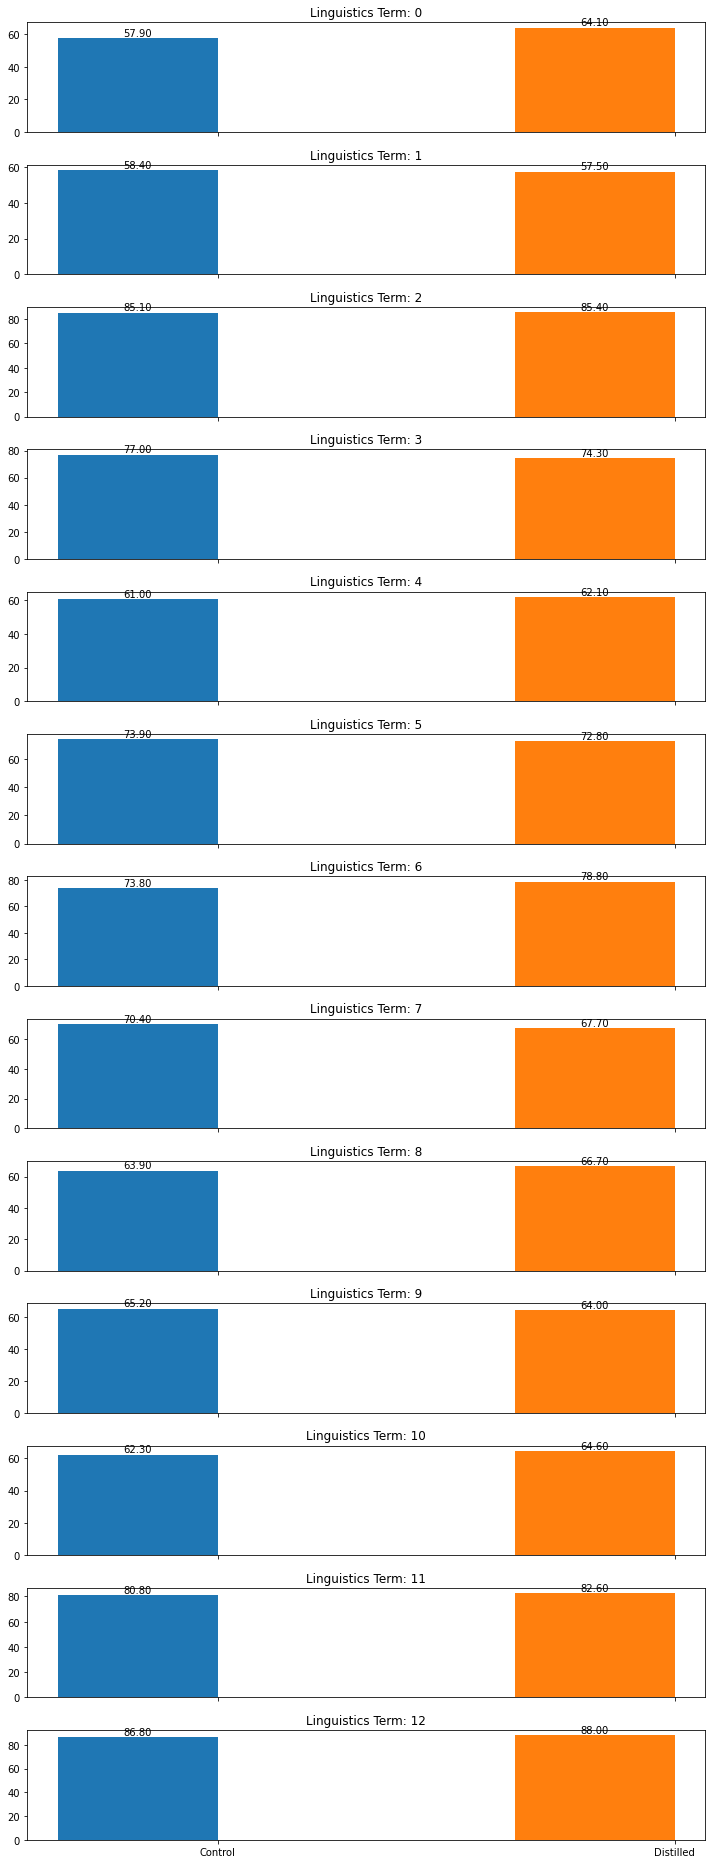

In [15]:
fig, axes = plt.subplots(nrows=13, ncols=1, figsize=(10, 2 * 13), sharex=True)
colors = ['#1f77b4', '#ff7f0e']

# Plot each row in its own subplot
for i, ax in enumerate(axes):
    row = df.iloc[i]
    ind = np.arange(2)  # Since we have two bars: control and distilled
    width = 0.35  # Width of the bars

    # Extracting the values for control and distilled
    values = row[['Control', 'Distilled']].values
    term = row.name  # Access the index value for the title

    ax.bar(ind - width/2, values, width, color=colors)
    ax.set_title(f'Linguistics Term: {term}')
    ax.set_xticks(ind)
    ax.set_xticklabels(['Control', 'Distilled'])

    # Annotate bars with their heights
    for j, value in enumerate(values):
        ax.annotate(f'{value:.2f}', xy=(ind[j] - width/2, value), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

KeyError: 'linguistics_term'

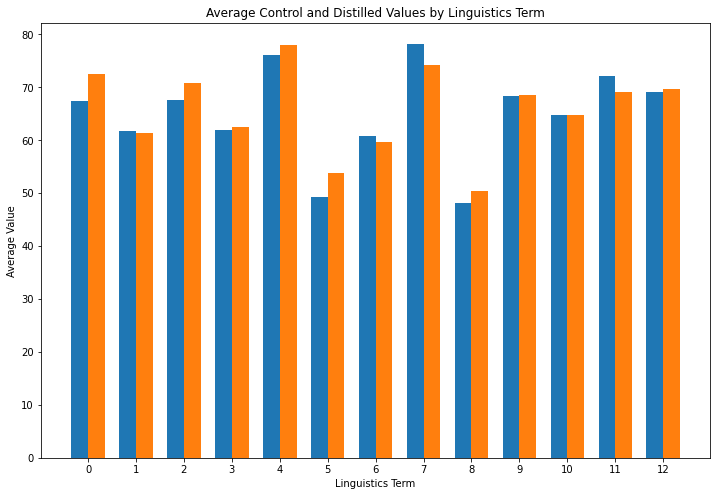

In [42]:
# Set the positions and width for the bars
ind = range(len(gb_df))  # the x locations for the groups
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the bars
bars1 = ax.bar([i - width/2 for i in ind], gb_df['Control'], width, label='Control')
bars2 = ax.bar([i + width/2 for i in ind], gb_df['Distilled'], width, label='Distilled')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Linguistics Term')
ax.set_ylabel('Average Value')
ax.set_title('Average Control and Distilled Values by Linguistics Term')
ax.set_xticks(ind)
ax.set_xticklabels(gb_df['linguistics_term'], rotation=45)
ax.legend()

# Function to add labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels
add_labels(bars1)
add_labels(bars2)

# Display the plot
plt.tight_layout()
plt.show()

In [51]:
mask = base_df['Distilled'] > base_df['Control']

In [52]:
def avg_dif(df):
    total_dif = 0
    for i, row in df.iterrows():
        dif = row['Distilled'] - row['Control']
        total_dif += abs(dif)
    return total_dif/len(df)

In [53]:
dist_dif = avg_dif(base_df[mask])
con_dif = avg_dif(base_df[-mask])

In [54]:
dist_dif

3.8521739130434782

In [55]:
con_dif

4.965909090909089

In [58]:
len(base_df[-mask])

44